# IMPORT,READ

In [1]:
# rdopen
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


kesehatan= kesehatan, harapan hidup,(fertility,kematian_anak)
sosial ekonomi = (pendapatan,gdp percapita,)inflasi,(export,Import)

# Method

In [2]:
#code here
# handling
# outlier
def outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

sc = StandardScaler()

# READ DATA

In [3]:
# Checknull
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


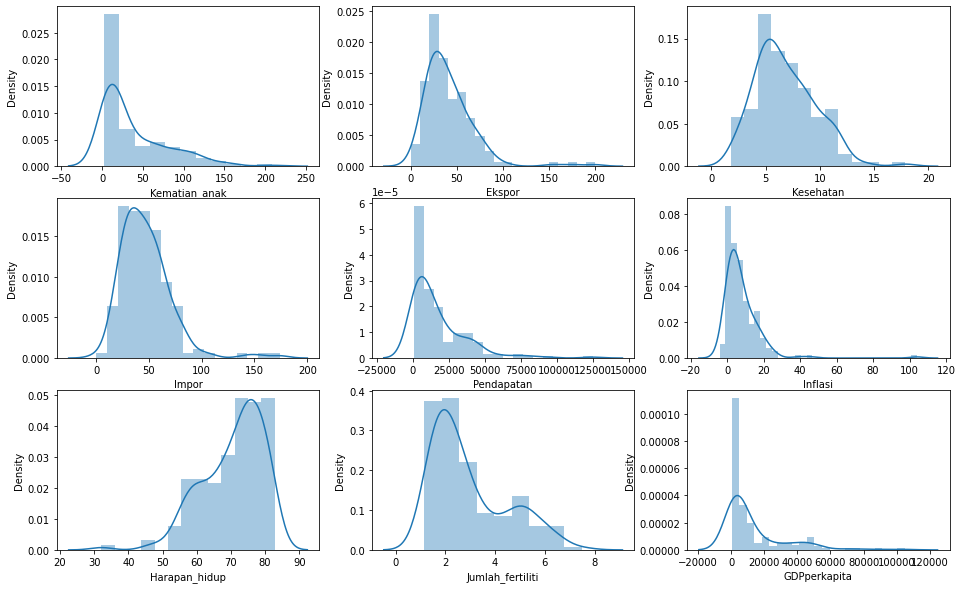

In [4]:
# univariet
plt.figure(figsize=(16,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.savefig('multi.png')
plt.show()


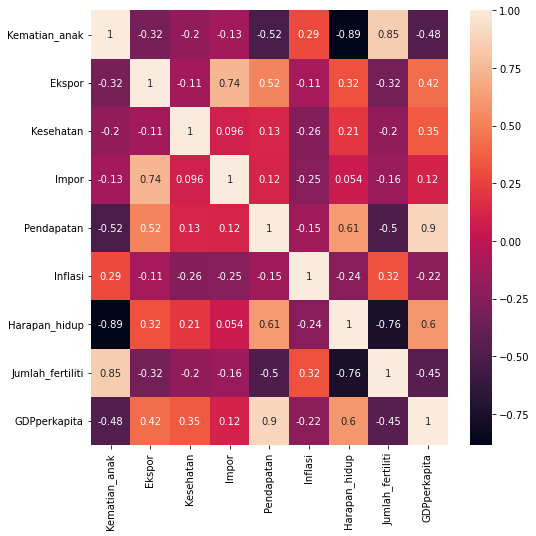

In [5]:
# multivariet
plt.figure(figsize=(8,8))
sns_plot=sns.heatmap(df.corr(), annot =True, fmt='.2g');
fig = sns_plot.get_figure()
fig.savefig("heatmap.png",transparent=False)

# FILTERING, CLUSTERING , LABELING
CLUSTER = 3 (KAYA,BERKEMBANG,MISKIN)

In [6]:
# PENDAPATAN +GDPPERCAPITA
df_gdp = outlier(df[['Pendapatan','GDPperkapita']]) #filtering
df_gdp.fillna(method='bfill',inplace=True) 

df_gdp_st = sc.fit_transform(df_gdp)

kmeans1 = KMeans(n_clusters = 3, random_state=42).fit(df_gdp_st)
labels_gdp = kmeans1.labels_
new_df_gdp = pd.DataFrame(data=df_gdp_st, columns=['Pendapatan', 'GDPperkapita'])
new_df_gdp['Cluster_Negara'] = labels_gdp

In [7]:
# Fertility_kematian Anak
df_ferti = outlier(df[['Kematian_anak','Jumlah_fertiliti']]) #filtering
df_ferti.fillna(method='bfill',inplace=True) 

df_ferti_st = sc.fit_transform(df_ferti)

kmeans_ferti = KMeans(n_clusters = 3, random_state=42).fit(df_ferti_st)
labels_ferti = kmeans_ferti.labels_
new_df_ferti = pd.DataFrame(data=df_ferti_st, columns=['Kematian_anak','Jumlah_fertiliti'])
new_df_ferti['Cluster_Negara'] = labels_ferti

In [8]:
# KesehatanGDP_Perkapita
df_keseGD = outlier(df[['Kesehatan','GDPperkapita']]) #filtering
df_keseGD.fillna(method='bfill',inplace=True) 

df_KeseGD_st = sc.fit_transform(df_keseGD)

kmeans_Kese = KMeans(n_clusters = 3, random_state=42).fit(df_KeseGD_st)
labels_Kese = kmeans_Kese.labels_
new_df_Kese = pd.DataFrame(data=df_KeseGD_st, columns=['Kesehatan','GDPperkapita'])
new_df_Kese['Cluster_Negara'] = labels_Kese

In [9]:
# Harapan Hidup dan Pendapatan
df_HarHid = outlier(df[['Harapan_hidup','Pendapatan']]) #filtering
df_HarHid.fillna(method='bfill',inplace=True) 

df_Harhid_st = sc.fit_transform(df_HarHid)

kmeans_Harhid = KMeans(n_clusters = 3, random_state=42).fit(df_Harhid_st)
labels_Harhid = kmeans_Harhid.labels_
new_df_Harhid = pd.DataFrame(data=df_Harhid_st, columns=['Harapan_hidup','Pendapatan'])
new_df_Harhid['Cluster_Negara'] = labels_Harhid


In [10]:
#  Ekspor dan Impor
df_EksIm = outlier(df[['Ekspor','Impor']]) #filtering
df_EksIm.fillna(method='bfill',inplace=True) 

df_EksIm_st = sc.fit_transform(df_EksIm)

kmeans_EksIm = KMeans(n_clusters = 3, random_state=42).fit(df_EksIm_st)
labels_EksIm = kmeans_EksIm.labels_
new_df_EksIm = pd.DataFrame(data=df_EksIm_st, columns=['Ekspor','Impor'])
new_df_EksIm['Cluster_Negara'] = labels_EksIm

# Check

In [11]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    167 non-null    float64
 1   GDPperkapita  167 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


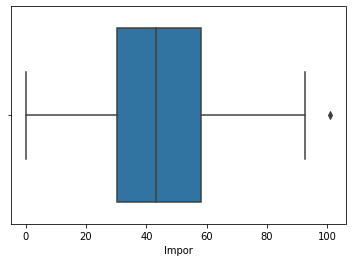

In [12]:
# Check Pencilan
sns.boxplot('Impor', data=df_EksIm);

Text(0, 0.5, 'wcss')

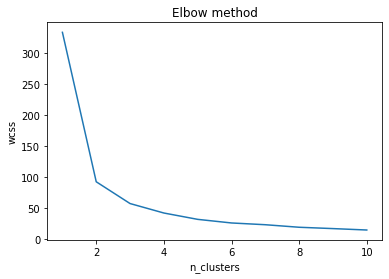

In [13]:
# Check Elbow
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_ferti_st)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

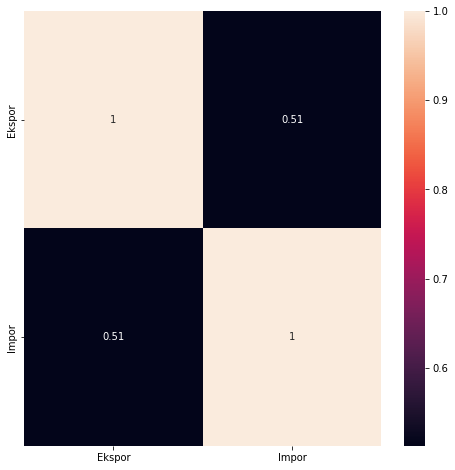

In [14]:
# checkkoefisien
plt.figure(figsize=(8,8))
sns_plot=sns.heatmap(df_EksIm.corr(), annot =True, fmt='.2g');

# SCATTER WITH CENTER 
data kmeans,cluster

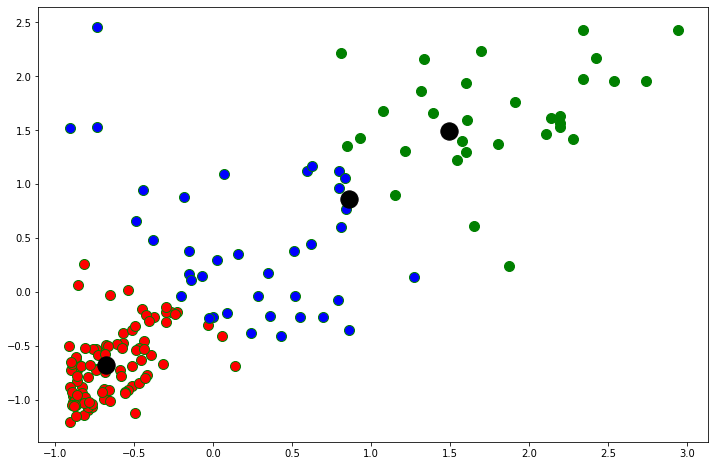

In [15]:
# scatterferti_kematian
plt.figure(figsize=(12,8))

plt.scatter(new_df_ferti['Kematian_anak'][new_df_ferti.Cluster_Negara==0], new_df_ferti['Jumlah_fertiliti'][new_df_ferti.Cluster_Negara==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df_ferti['Kematian_anak'][new_df_ferti.Cluster_Negara==1], new_df_ferti['Jumlah_fertiliti'][new_df_ferti.Cluster_Negara==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df_ferti['Kematian_anak'][new_df_ferti.Cluster_Negara==2], new_df_ferti['Jumlah_fertiliti'][new_df_ferti.Cluster_Negara==2], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

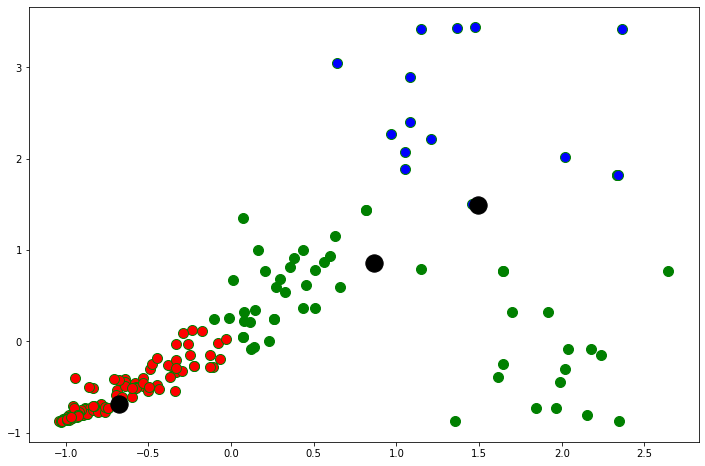

In [16]:
# scatter_pendapatan
plt.figure(figsize=(12,8))

plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.Cluster_Negara==0], new_df_gdp['GDPperkapita'][new_df_gdp.Cluster_Negara==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.Cluster_Negara==1], new_df_gdp['GDPperkapita'][new_df_gdp.Cluster_Negara==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.Cluster_Negara==2], new_df_gdp['GDPperkapita'][new_df_gdp.Cluster_Negara==2], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

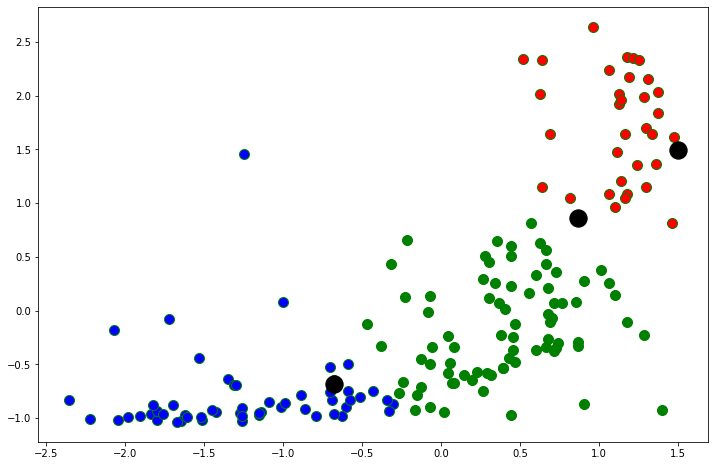

In [17]:
# scatterHarHid_Pendapatan
plt.figure(figsize=(12,8))

plt.scatter(new_df_Harhid['Harapan_hidup'][new_df_Harhid.Cluster_Negara==0], new_df_Harhid['Pendapatan'][new_df_Harhid.Cluster_Negara==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df_Harhid['Harapan_hidup'][new_df_Harhid.Cluster_Negara==1], new_df_Harhid['Pendapatan'][new_df_Harhid.Cluster_Negara==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df_Harhid['Harapan_hidup'][new_df_Harhid.Cluster_Negara==2], new_df_Harhid['Pendapatan'][new_df_Harhid.Cluster_Negara==2], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

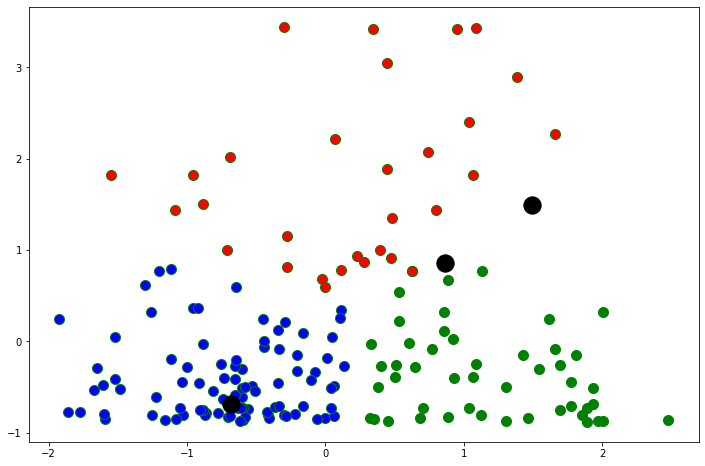

In [18]:
# scatterKese_Pendapatan
plt.figure(figsize=(12,8))

plt.scatter(new_df_Kese['Kesehatan'][new_df_Kese.Cluster_Negara==0], new_df_Kese['GDPperkapita'][new_df_Kese.Cluster_Negara==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df_Kese['Kesehatan'][new_df_Kese.Cluster_Negara==1], new_df_Kese['GDPperkapita'][new_df_Kese.Cluster_Negara==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df_Kese['Kesehatan'][new_df_Kese.Cluster_Negara==2], new_df_Kese['GDPperkapita'][new_df_Kese.Cluster_Negara==2], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

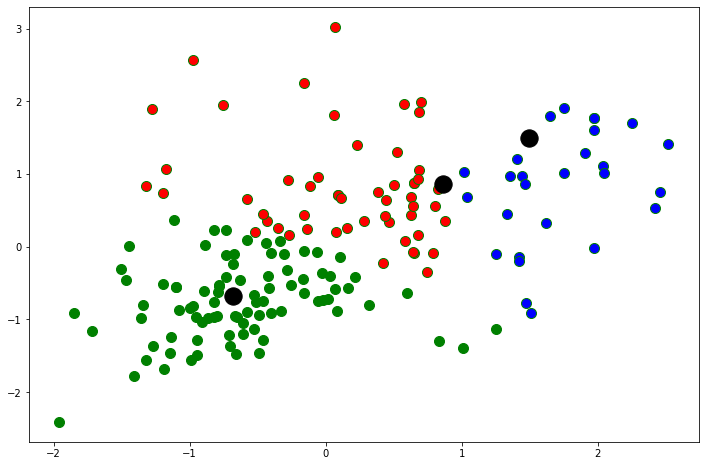

In [19]:
# scatterEksporImpor
plt.figure(figsize=(12,8))

plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.Cluster_Negara==0], new_df_EksIm['Impor'][new_df_EksIm.Cluster_Negara==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.Cluster_Negara==1], new_df_EksIm['Impor'][new_df_EksIm.Cluster_Negara==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.Cluster_Negara==2], new_df_EksIm['Impor'][new_df_EksIm.Cluster_Negara==2], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

# HASIL OUTPUT 

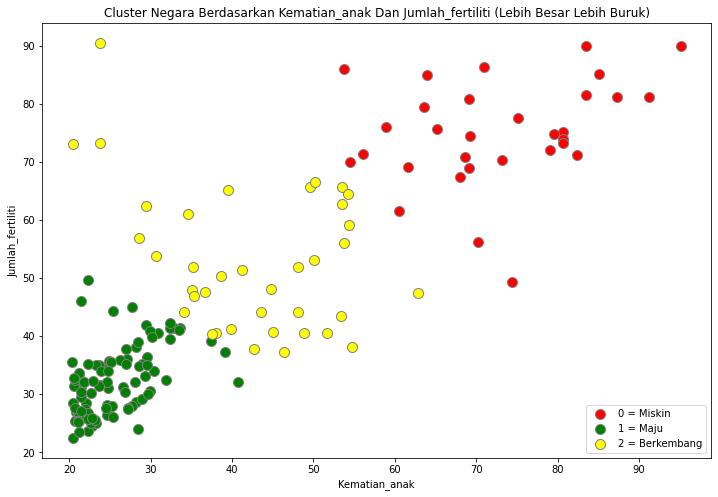

In [20]:
# untuk melihat hasil clustering dengan mudah, inverse tranform untuk melihat data yang asli namun dengan data yang sudah di scalard dan cluster
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_ferti_st)
labels_ferti1 = kmeans3.labels_
new_df_kem = pd.DataFrame(data=sc.inverse_transform(df_ferti_st), columns=['Kematian_anak', 'Jumlah_fertiliti'])
new_df_kem['label2_kmeans'] = labels_ferti1

# tampil
plt.figure(figsize=(12,8))

plt.scatter(new_df_kem['Kematian_anak'][new_df_kem.label2_kmeans == 0], new_df_kem['Jumlah_fertiliti'][new_df_kem.label2_kmeans == 0], c='red', s=100, edgecolor='grey',label='0 = Miskin')
plt.scatter(new_df_kem['Kematian_anak'][new_df_kem.label2_kmeans == 1], new_df_kem['Jumlah_fertiliti'][new_df_kem.label2_kmeans == 1], c='green', s=100, edgecolor='grey',label='1 = Maju')
plt.scatter(new_df_kem['Kematian_anak'][new_df_kem.label2_kmeans == 2], new_df_kem['Jumlah_fertiliti'][new_df_kem.label2_kmeans == 2], c='yellow', s=100, edgecolor='grey',label='2 = Berkembang')

plt.legend()
plt.title('Cluster Negara Berdasarkan Kematian_anak Dan Jumlah_fertiliti (Lebih Besar Lebih Buruk)')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.savefig('Kematian_JumlahFerti.png')
plt.show()

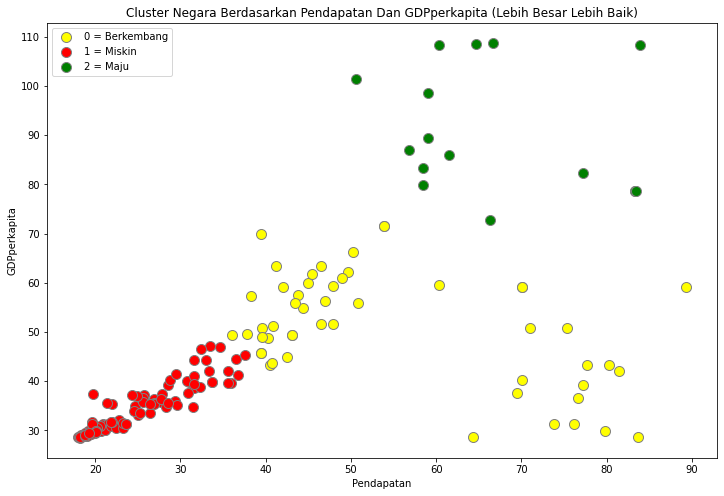

In [21]:
# untuk melihat hasil clustering dengan mudah, inverse tranform untuk melihat data yang asli namun dengan data yang sudah di scalard dan cluster
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_gdp_st)
labels_gdp1 = kmeans3.labels_
new_df_gdp = pd.DataFrame(data=sc.inverse_transform(df_gdp_st), columns=['Pendapatan', 'GDPperkapita'])
new_df_gdp['label2_kmeans'] = labels_gdp1

# tampil
plt.figure(figsize=(12,8))

plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.label2_kmeans == 0], new_df_gdp['GDPperkapita'][new_df_gdp.label2_kmeans == 0], c='Yellow', s=100, edgecolor='grey',label='0 = Berkembang')
plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.label2_kmeans == 1], new_df_gdp['GDPperkapita'][new_df_gdp.label2_kmeans == 1], c='red', s=100, edgecolor='grey',label='1 = Miskin')
plt.scatter(new_df_gdp['Pendapatan'][new_df_gdp.label2_kmeans == 2], new_df_gdp['GDPperkapita'][new_df_gdp.label2_kmeans == 2], c='green', s=100, edgecolor='grey',label='2 = Maju')

plt.legend()
plt.title('Cluster Negara Berdasarkan Pendapatan Dan GDPperkapita (Lebih Besar Lebih Baik)')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.savefig('Pendapatan_GDP.png')
plt.show()

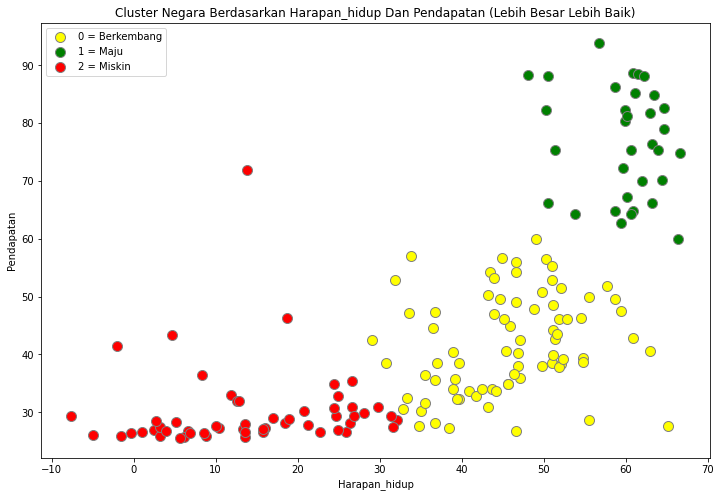

In [22]:
# untuk melihat hasil clustering dengan mudah, inverse tranform untuk melihat data yang asli namun dengan data yang sudah di scalard dan cluster
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_Harhid_st)
labels_Harhid1 = kmeans3.labels_
new_df_har = pd.DataFrame(data=sc.inverse_transform(df_Harhid_st), columns=['Harapan_hidup', 'Pendapatan'])
new_df_har['label2_kmeans'] = labels_Harhid1

# tampil
plt.figure(figsize=(12,8))

plt.scatter(new_df_har['Harapan_hidup'][new_df_har.label2_kmeans == 0], new_df_har['Pendapatan'][new_df_har.label2_kmeans == 0], c='yellow', s=100, edgecolor='grey',label='0 = Berkembang')
plt.scatter(new_df_har['Harapan_hidup'][new_df_har.label2_kmeans == 1], new_df_har['Pendapatan'][new_df_har.label2_kmeans == 1], c='green', s=100, edgecolor='grey',label='1 = Maju')
plt.scatter(new_df_har['Harapan_hidup'][new_df_har.label2_kmeans == 2], new_df_har['Pendapatan'][new_df_har.label2_kmeans == 2], c='red', s=100, edgecolor='grey',label='2 = Miskin')

plt.legend()
plt.title('Cluster Negara Berdasarkan Harapan_hidup Dan Pendapatan (Lebih Besar Lebih Baik)')
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
plt.savefig('HarapanHidup_Pendapatan.png')
plt.show()

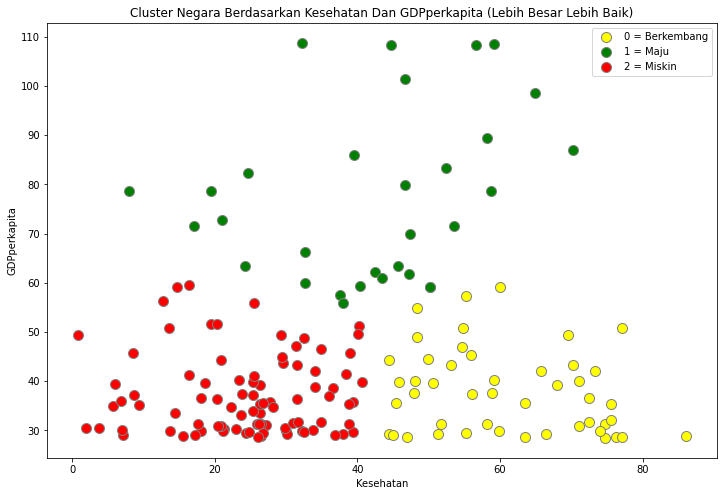

In [23]:
# untuk melihat hasil clustering dengan mudah, inverse tranform untuk melihat data yang asli namun dengan data yang sudah di scalard dan cluster
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_KeseGD_st)
labels_Kese1 = kmeans3.labels_
new_df_Kes = pd.DataFrame(data=sc.inverse_transform(df_KeseGD_st), columns=['Kesehatan', 'GDPperkapita'])
new_df_Kes['label2_kmeans'] = labels_Kese1

# tampil
plt.figure(figsize=(12,8))

plt.scatter(new_df_Kes['Kesehatan'][new_df_Kes.label2_kmeans == 0], new_df_Kes['GDPperkapita'][new_df_Kes.label2_kmeans == 0], c='yellow', s=100, edgecolor='grey',label='0 = Berkembang')
plt.scatter(new_df_Kes['Kesehatan'][new_df_Kes.label2_kmeans == 1], new_df_Kes['GDPperkapita'][new_df_Kes.label2_kmeans == 1], c='green', s=100, edgecolor='grey',label='1 = Maju')
plt.scatter(new_df_Kes['Kesehatan'][new_df_Kes.label2_kmeans == 2], new_df_Kes['GDPperkapita'][new_df_Kes.label2_kmeans == 2], c='red', s=100, edgecolor='grey',label='2 = Miskin')

plt.legend()
plt.title('Cluster Negara Berdasarkan Kesehatan Dan GDPperkapita (Lebih Besar Lebih Baik)')
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.savefig('Kesehatan_GDPperkapita.png')
plt.show()

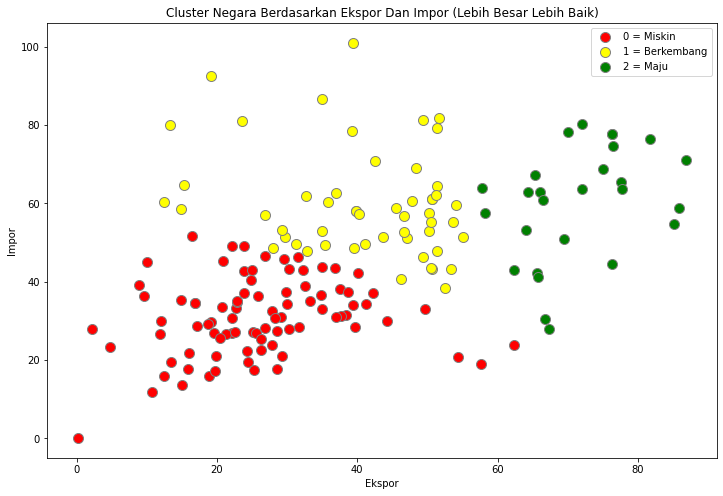

In [24]:
# untuk melihat hasil clustering dengan mudah, inverse tranform untuk melihat data yang asli namun dengan data yang sudah di scalard dan cluster
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_EksIm_st)
labels_EksIm1 = kmeans3.labels_
new_df_EksIm = pd.DataFrame(data=sc.inverse_transform(df_EksIm_st), columns=['Ekspor', 'Impor'])
new_df_EksIm['label2_kmeans'] = labels_EksIm1

# tampil
plt.figure(figsize=(12,8))

plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.label2_kmeans == 0], new_df_EksIm['Impor'][new_df_EksIm.label2_kmeans == 0], c='red', s=100, edgecolor='grey',label='0 = Miskin')
plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.label2_kmeans == 1], new_df_EksIm['Impor'][new_df_EksIm.label2_kmeans == 1], c='yellow', s=100, edgecolor='grey',label='1 = Berkembang')
plt.scatter(new_df_EksIm['Ekspor'][new_df_EksIm.label2_kmeans == 2], new_df_EksIm['Impor'][new_df_EksIm.label2_kmeans == 2], c='green', s=100, edgecolor='grey',label='2 = Maju')

plt.legend()
plt.title('Cluster Negara Berdasarkan Ekspor Dan Impor (Lebih Besar Lebih Baik)')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.savefig('Ekspor_Impor.png')
plt.show()

# CARI NEGARA

In [25]:
# Input Label To OG data
df['GDP_labels'] = pd.Series(labels_gdp).astype('object')
df['Ferti_labels'] = pd.Series(labels_ferti).astype('object')
df['Harhid_labels'] = pd.Series(labels_Harhid).astype('object')
df['KeseGD_labels'] = pd.Series(labels_Kese).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,GDP_labels,Ferti_labels,Harhid_labels,KeseGD_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,2,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,2,2,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,1,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,2,2,2


In [26]:
# Sihouette SCore
print('GDP',silhouette_score(df_gdp_st, labels= labels_gdp))
print('Ferti',silhouette_score(df_ferti_st, labels= labels_ferti))
print('Harhid',silhouette_score(df_Harhid_st, labels= labels_Harhid))
print('Kese/GDP',silhouette_score(df_KeseGD_st, labels= labels_Kese))
print('EksporIm',silhouette_score(df_EksIm_st, labels= labels_Kese)) #Skor Tidak Relevan, Nilai Minus Menandakan data overlaping dan clustering tidak sempurna maka data tidak dimasukan

GDP 0.577093396730489
Ferti 0.5478461707080513
Harhid 0.5359840390982925
Kese/GDP 0.479684467610164
EksporIm -0.03420374139661004


In [27]:
negara_maju = df[ (df.GDP_labels == 1) ]
negara_maju = negara_maju.sort_values(by=['GDPperkapita'],ascending=True).reset_index(drop=True)
negara_maju

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,GDP_labels,Ferti_labels,Harhid_labels,KeseGD_labels
0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0,2,0
1,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,1,0,2,0
2,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1,0,2,0
3,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,1,0,2,2
4,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1,2,2,0
96,Grenada,14.6,23.80,5.86,49.2,11200,0.480,71.3,2.24,7370,1,1,0,2
97,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500,1,1,0,2
98,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600,1,1,0,0


In [28]:
negara_berkembang = df[ (df.GDP_labels == 0) ]
negara_berkembang = negara_berkembang.sort_values(by=['GDPperkapita'],ascending=True).reset_index(drop=True)
negara_berkembang

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,GDP_labels,Ferti_labels,Harhid_labels,KeseGD_labels
0,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0,1,0,2
1,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,0,1,0,2
2,Iran,19.3,24.4,5.60,19.4,17400,15.900,74.5,1.76,6530,0,1,0,2
3,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,0,1,0,2
4,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,0,1,0,2
5,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8080,0,1,0,0
6,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,0,1,0,0
7,Romania,11.5,32.6,5.58,38.8,17800,3.530,73.7,1.59,8230,0,1,0,2
8,Suriname,24.1,52.5,7.01,38.4,14200,7.200,70.3,2.52,8300,0,1,0,2
9,Gabon,63.7,57.7,3.50,18.9,15400,16.600,62.9,4.08,8750,0,2,2,2


In [29]:
# Cluster Negara Miskin
negara_miskin = df[(df.GDP_labels == 1) & (df.Ferti_labels == 0) & (df.Harhid_labels == 2) & (df.KeseGD_labels == 2)]
negara_miskin = negara_miskin.sort_values(by=['GDPperkapita'],ascending=True).reset_index(drop=True)
negara_miskin

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,GDP_labels,Ferti_labels,Harhid_labels,KeseGD_labels
0,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,1,0,2,2
1,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419,1,0,2,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,1,0,2,2
3,Gambia,80.3,23.8,5.69,42.7,1660,4.300,65.5,5.71,562,1,0,2,2
4,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,0,2,2
5,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,1,0,2,2
6,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702,1,0,2,2
7,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,1,0,2,2
8,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,0,2,2
9,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,1,0,2,2


In [30]:
# NEGARA
compression_opts = dict(method='zip',
                        archive_name='NegaraMiskin.csv')  
negara_miskin.to_csv('Negara_miskin.zip', index=False,
          compression=compression_opts)  